<a href="https://colab.research.google.com/github/rajdeepcoder10/Liver-CT-Scan_Project/blob/main/Novak_Djokovic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
import os
import numpy as np
import random
from PIL import Image,ImageEnhance



In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.utils import shuffle


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
test_dir = '/content/drive/MyDrive/New_images_mine/Testing'
train_dir = '/content/drive/MyDrive/New_images_mine/Training'
train_paths= []
train_labels= []
for label in os.listdir(train_dir):
  for image in os.listdir(os.path.join(train_dir,label)):
    train_paths.append(os.path.join(train_dir,label,image))
    train_labels.append(label)
train_path,train_labels=shuffle(train_paths,train_labels)

train_paths

test_paths=[]
test_labels=[]
for label in os.listdir(test_dir):
  for image in os.listdir(os.path.join(test_dir,label)):
    test_paths.append(os.path.join(test_dir,label,image))
    test_labels.append(label)
test_path,test_labels=shuffle(test_paths,test_labels)

test_paths

['/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-piTr_0002.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-piTr_0001.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-piTr_0000.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0017.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0015.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0019.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0027.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0024.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0021.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0016.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0025.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-piTr_0009.jpg',
 '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0018.jpg',
 '/c

Data_Visulaization

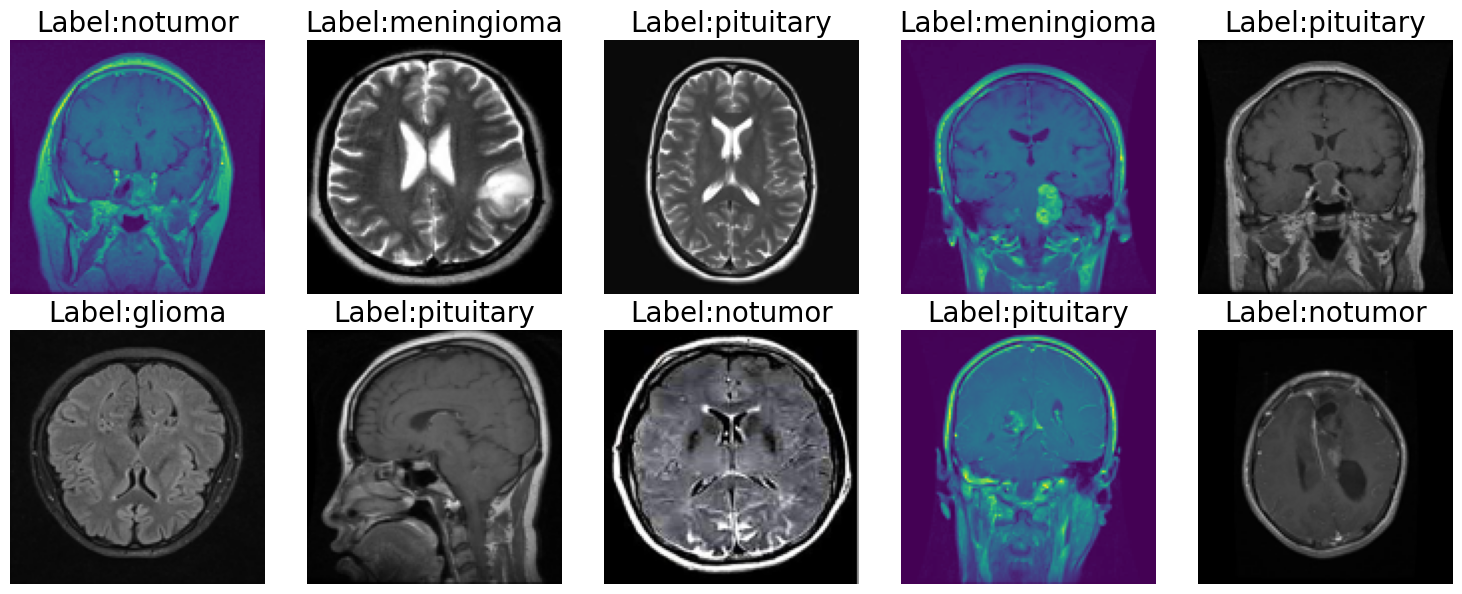

In [ ]:
import random
import matplotlib.pyplot as plt
#select random indices
random_indices=random.sample(range(len(train_paths)),10)
random_indices
#create a figure to display images in 2 rows
fig,axes=plt.subplots(2,5,figsize=(15,6))
axes=axes.ravel()

for i,idx in enumerate(random_indices):
  img_path= train_paths[idx]
  img=Image.open(img_path)
  img=img.resize((128,128))

  axes[i].imshow(img)
  axes[i].axis("off")
  axes[i].set_title(f"Label:{train_labels[idx]}",fontsize=20)

plt.tight_layout()
plt.show()

Image Functions

In [ ]:
#Image Augmentation
def augment_image(image):
  image=Image.fromarray(np.uint8(image))
  image=ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
  image=ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
  image=np.array(image)/255.0
  return image
# Load images and apply augmentation
def open_images(paths):
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img = augment_image(img)
        img = preprocess_input(np.array(img * 255.0))  # Apply VGG16 preprocessing
        images.append(img)
    return np.array(images)

import numpy as np

def encoder_label(labels):
  unique_labels = os.listdir(train_dir)
  encoded_labels = []  # Initialize list for encoded labels
  for label in labels:
    encoded_labels.append(unique_labels.index(label))
    return np.array(encoded_labels, dtype=np.int32)  # Convert to NumPy array


def data_gen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[i:i+batch_size]
            batch_labels = encoder_label(batch_labels)  # Encode batch labels
            batch_labels = np.array(batch_labels, dtype=np.int32)  # Convert to NumPy array
            yield batch_images, batch_labels  # Yield images and encoded labels

In [ ]:
gen = data_gen(train_paths, train_labels, batch_size=20, epochs=1)
images, labels = next(gen)
print(images.shape, labels.shape)

NameError: name 'IMAGE_SIZE' is not defined

In [ ]:
print(train_paths[:5], train_labels[:5])

['/content/drive/MyDrive/New_images_mine/Training/meningioma/Tr-me_0324.jpg', '/content/drive/MyDrive/New_images_mine/Training/meningioma/Tr-me_0328.jpg', '/content/drive/MyDrive/New_images_mine/Training/meningioma/Tr-me_0340.jpg', '/content/drive/MyDrive/New_images_mine/Training/meningioma/Tr-me_0325.jpg', '/content/drive/MyDrive/New_images_mine/Training/meningioma/Tr-me_0342.jpg'] ['notumor', 'meningioma', 'pituitary', 'notumor', 'notumor']


In [ ]:
len(os.listdir(train_dir))

4

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image, ImageEnhance
import random

# Image Augmentation
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

# Load images and apply augmentation
def open_images(paths):
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img = augment_image(img)
        images.append(img)
    return np.array(images)

# Encode labels
def encoder_label(labels):
    unique_labels = sorted(os.listdir(train_dir))  # Sort for consistency
    encoded_labels = []
    for label in labels:
        encoded_labels.append(unique_labels.index(label))
    return np.array(encoded_labels, dtype=np.int32)  # Return NumPy array

# Data generator
def data_gen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[i:i+batch_size]
            batch_labels = encoder_label(batch_labels)
            yield batch_images, batch_labels

# Model Architecture
IMAGE_SIZE = 128
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

# Set only the last few layers as trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Build Model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Parameters
batch_size = 20
steps = int(len(train_paths) / batch_size)
epochs = 1

# Train the model
history = model.fit(data_gen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 8,128,644 (31.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

285/285 ━━━━━━━━━━━━━━━━━━━━ 1448s 5s/step - accuracy: 0.2547 - loss: 1.4387


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


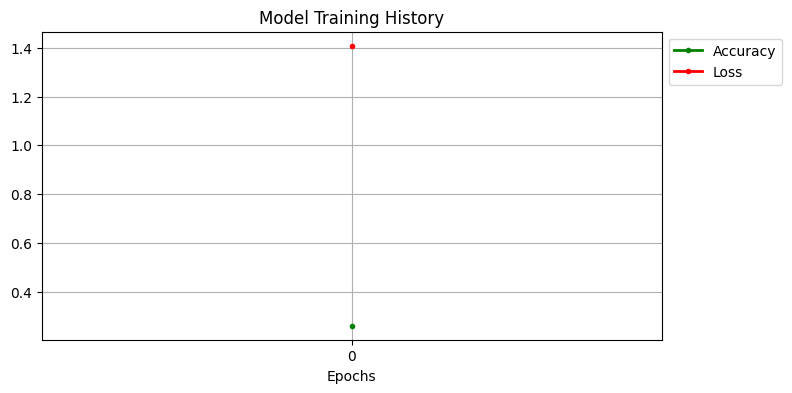

In [ ]:
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(history.history['accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')  # Use plt.title for the title
plt.xlabel('Epochs')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))  # Corrected legend
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
import numpy as np

test_images = open_images(test_paths)
test_labels_encoded = encoder_label(test_labels)  # Changed to encoder_label
test_predictions = model.predict(test_images)
print('Classification Report')
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))

41/41 ━━━━━━━━━━━━━━━━━━━━ 270s 7s/step
Classification Report
              precision    recall  f1-score   support

           0       0.22      0.28      0.25       300
           1       0.00      0.00      0.00       306
           2       0.32      0.69      0.43       405
           3       0.24      0.04      0.07       300

    accuracy                           0.29      1311
   macro avg       0.19      0.25      0.19      1311
weighted avg       0.20      0.29      0.21      1311



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix
[[ 85   0 204  11]
 [ 89   0 203  14]
 [113   0 278  14]
 [ 91   0 197  12]]


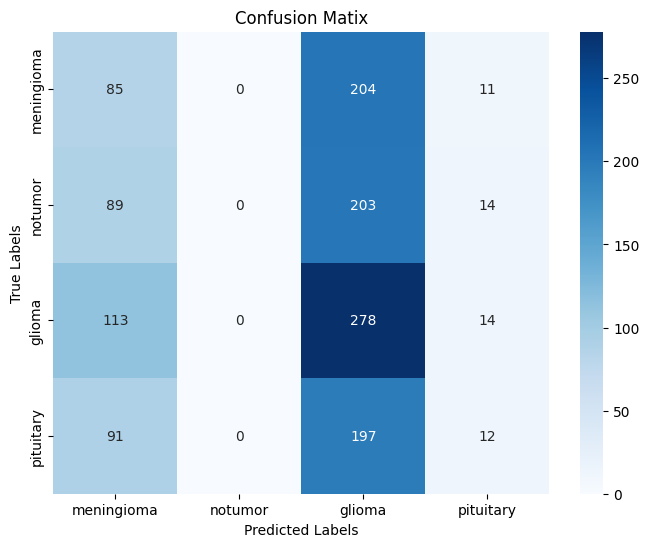

In [ ]:
conf_matrix=confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix")
print(conf_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=os.listdir(train_dir),yticklabels=os.listdir(train_dir))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matix")
plt.show()

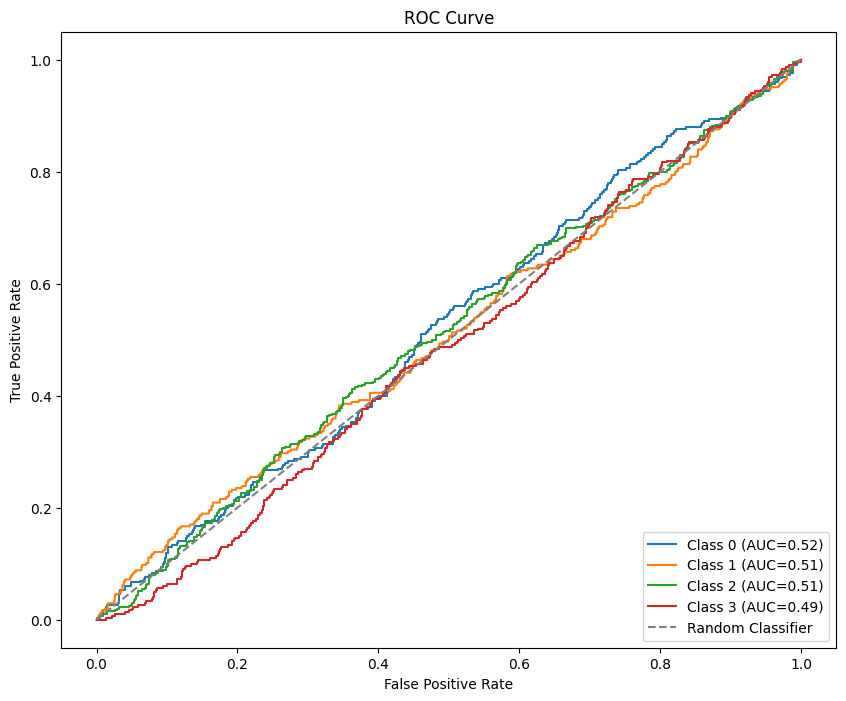

In [ ]:
test_labels_bin=label_binarize(test_labels_encoded,classes=np.arange(len(os.listdir(train_dir))))
test_predictions_bin=test_predictions

fpr,tpr,roc_auc= {},{},{}
for i in range(len(os.listdir(train_dir))):
  fpr[i],tpr[i],_=roc_curve(test_labels_bin[:,i],test_predictions_bin[:,i])
  roc_auc[i]=auc(fpr[i],tpr[i])
#plot the figure
plt.figure(figsize=(10,8))
for i in range(len(os.listdir(train_dir))):
  plt.plot(fpr[i],tpr[i],label=f"Class {i} (AUC={roc_auc[i]:.2f})")

plt.plot([0,1],[0,1],linestyle="--",color='gray',label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Save and Load Model

In [ ]:
#save the model
model.save('model.h5')

In [ ]:
from tensorflow.keras.models import load_model
#Load the trained model
model=load_model('model.h5')

MRI Tumor Detection System

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
class_labels =['pitutary','glioma', 'notumor', 'meningioma']
def detect_and_display(image_path,model):
  try:
    img=load_img(image_path,target_size=(128,128))
    img_array=img_to_array(img)
    img_array=np.expand_dims(img,axis=0)

    #predictoin
    predictions=model.predict(img_array)
    predicted_class_index=np.argmax(predictions)
    confidence_score=np.max(predictions,axis=1)[0]
    #determine the class
    if class_labels[predicted_class_index]=='notumor':
      return "No Tumor Detected"
    else:
      result=f"Tumor: {class_labels[predicted_class_index]}"

    #display
    plt.imshow(load_img(img_path))
    plt.axis('off')
    plt.title(f"{result} (Confidence :) {confidence_score * 100:.2f}%")
    plt.show()

  except Exception as e:
    print("Error processing the image:",str(e))

In [ ]:
import os

image_dir = '/content/drive/MyDrive/'
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
print("Available images:", image_files)

# Pick the first image (or any specific one)
if image_files:
    image_path = os.path.join(image_dir, image_files[0])
    print("Selected image path:", image_path)
else:
    print("No images found in", image_dir)

Available images: ['1E09DEF8-55B0-4D91-A7CD-151AEEAAA63C.jpeg', '15B76633-C765-48EE-89BF-0121F97DBE12.jpeg', '051F27AE-736B-42B7-A3DF-1E0E0626B218.jpeg', 'B52AC7CC-1738-431E-95FB-0274AAC09BEF.jpeg', 'g1.png', 'g2.png', 'PHOTO-2024-02-20-15-19-10.jpg', 'PHOTO-2024-03-07-19-33-10.jpg', 'Payment1.jpg', 'PHOTO-2024-03-11-22-54-51.jpg', 'MUN.jpg', 'MUN123.jpg', 'PHOTO-2024-09-12-20-00-53.jpg', 'PHOTO-2024-09-12-20-08-43.jpg', 'PaymentNova.jpg', 'Workshop.jpg', 'accuracy_plot.png', 'loss_plot.png', 'confusion_matrix.png', 'roc_curve.png']
Selected image path: /content/drive/MyDrive/1E09DEF8-55B0-4D91-A7CD-151AEEAAA63C.jpeg


In [ ]:
image_path=''
detect_and_display(image_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


'No Tumor Detected'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
Predicted class: glioma (index: 0)
Confidence: 0.4490


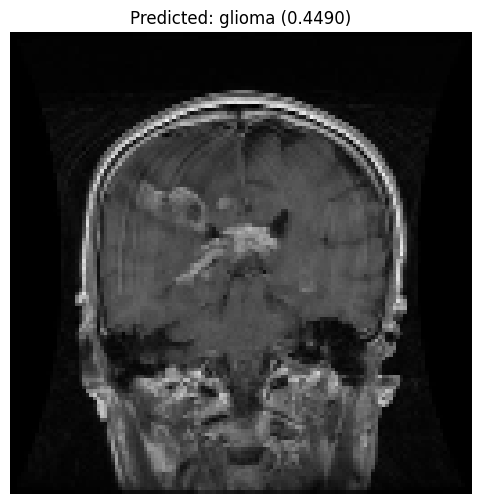

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import os

# Define the detect_and_display function
def detect_and_display(image_path, model):
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img_array = np.array(img) / 255.0
        img_array = preprocess_input(img_array * 255.0)  # Apply VGG16 preprocessing
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 128, 128, 3)

        # Make a prediction
        prediction = model.predict(img_array)
        predicted_class_idx = np.argmax(prediction, axis=1)[0]
        predicted_prob = np.max(prediction)

        # Map the class index to the class name
        unique_labels = sorted(os.listdir(train_dir))  # Same as in encoder_label
        predicted_class_name = unique_labels[predicted_class_idx]

        # Print the result
        print(f"Predicted class: {predicted_class_name} (index: {predicted_class_idx})")
        print(f"Confidence: {predicted_prob:.4f}")

        # Display the image
        plt.figure(figsize=(6, 6))
        plt.imshow(img)  # Display the original image (not preprocessed)
        plt.title(f"Predicted: {predicted_class_name} ({predicted_prob:.4f})")
        plt.axis('off')
        plt.show()

    except FileNotFoundError:
        print(f"Image not found at {image_path}")
    except Exception as e:
        print("Error processing image:" ,str(e))

# Define the image path and run the function
image_path = '/content/drive/MyDrive/New_images_mine/Testing/glioma/Te-gl_0249.jpg'
detect_and_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
Predicted class: glioma (index: 0)
Confidence: 0.4367


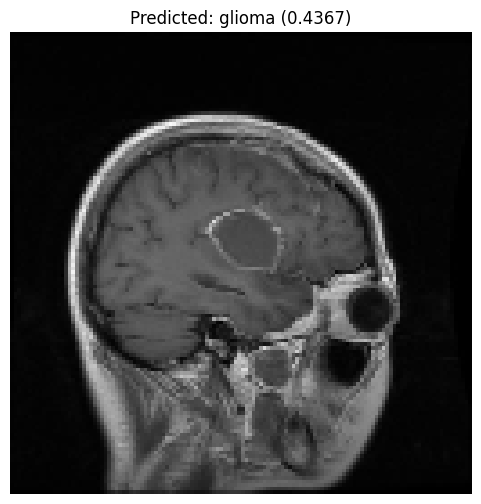

In [ ]:
image_path='/content/drive/MyDrive/New_images_mine/Testing/glioma/Te-gl_0278.jpg'
detect_and_display(image_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
Predicted class: notumor (index: 2)
Confidence: 0.4628


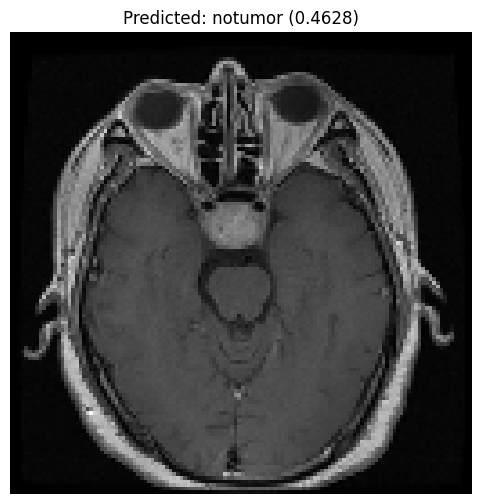

In [ ]:
image_path= '/content/drive/MyDrive/New_images_mine/Testing/pituitary/Te-pi_0042.jpg'
detect_and_display(image_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Predicted class: pituitary (index: 3)
Confidence: 0.3567


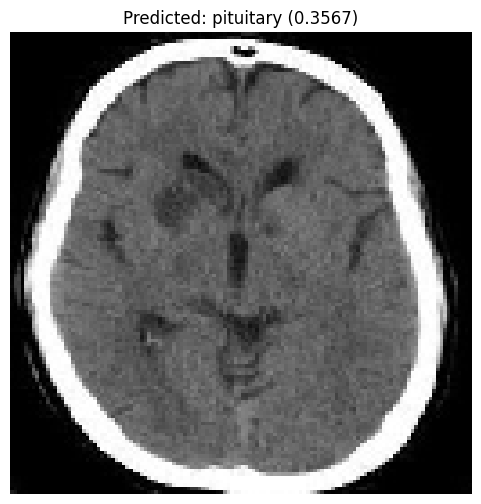

In [ ]:
image_path='/content/drive/MyDrive/New_images_mine/Testing/notumor/Te-no_0034.jpg'
detect_and_display(image_path,model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Predicted class: notumor (index: 2)
Confidence: 0.4250


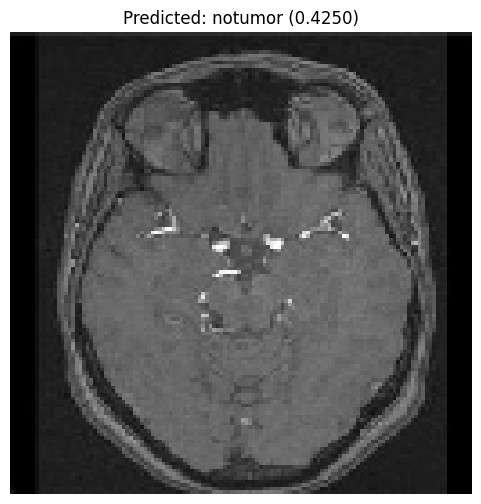

In [ ]:
image_path='/content/drive/MyDrive/New_images_mine/Testing/notumor/Te-no_0024.jpg'
detect_and_display(image_path,model)